# An Inquiry into the Influence of Race in "Terry Stops"arrests.

### Overview

##### Business Understanding.

“Terry Stop,” also known as a “stop and frisk,” is Fourth Amendment rights provision, allowing law enforcement officers to temporarily detain an individual based on reasonable suspicion of criminal activity.A landmark Supreme Court case Terry v. Ohio (1968), permits officers to conduct a brief search without the need for probable cause that would justify an arrest.A police officer may therefore briefly stop and or detain an individual if they reasonably suspects that an individual is armed, engaged in, or about to be engaged in criminal conduct and as such in trafic management, the police do not need to believe that the vehicle or any occupant is involved in criminal activity.

Terry Stops have elicited debate on especilly the subjectiveness of the officer executing the provisions of the Fouth Amendment,and as such may be prone to racial profiling.It is against this backdrop that an inquiry into the influence of race in Terry Stops arrest finds its motivation.On the positive, Terry Stops permits law enforcement officers to prevent a crime before it occurs thus protecting themselves and communities.

The Supreme Court in Terry v. Ohio held that such stops are a necessary compromise, balancing an individual's right to privacy and the community's interest in preventing crime and ensuring officer safety.

Debate surrounding Terry Stops particularly regarding their potential for abuse and racial profiling forms the basis for our model to predict an arrest.

#### Data Understanding

This inquiry uses data and records of police reported stops under Terry v. Ohio, 392 U.S. 1 (1968) amendment, between 15 March 2015 and 17th December 2024 mined from the City of Seattle Open Data Program portal, based on the Cross Industry Standard Data Mining Methodology. The data comprises of rows representing unique stop with each record containing perceived demographics of the subject, as reported by the officer making the stop and officer demographics as reported to the Seattle Police Department thus; Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop , Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop, Race and Gender of the officer, as reported by the officer, Perceived gender and race of the subject, as reported by the officer, Subject Age Group (10 year increments) as reported by the officer among others.

The data is clustered into 62189 rows and 23 columns, which are cleaned and scaled to 58509 rows and 7 columns, the train and test have 40956 and17553 rows respectively.

This findings and information from this inquiry is useful to Community based organizations,law enforcement agencies,judicial officers and the general public in informing policy advocacy,these forms the stakeholders.

##### Important Terry Stops records and data parameters used in this classification Modelling.

###### Weapon Type
Type of weapon, if any, identified during a search or frisk of the subject,including Lethal Cutting Instrument, Riffle, Knives, hitting object etc.

###### Officer Gender
Gender of the officer

###### Officer Race
Race of the officer include White, Hispanic, Asian, Black or African American

###### Subject Perceived Race
Perceived gender and race of the subject

###### Subject Perceived Gender
Perceived gender and race of the subject

###### Arrest Flag
Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop.

###### Frisk Flag
Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop

In [1]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv("Terry_Stops_data.csv")
df.head(3)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,18 - 25,-1,20180000108418,403294,Offense Report,NaN,6115,1968,M,White,...,18:33:00.0000000,OBS - FIGHT - IP - PHYSICAL (NO WEAPONS),--DISTURBANCE - OTHER,911,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,N,N,North,N,N1
1,1 - 17,-1,20150000268595,72054,Offense Report,NaN,7670,1983,M,White,...,12:40:00.0000000,ASLT - CRITICAL (NO SHOOTINGS),"--ASSAULTS, OTHER",911,WEST PCT 1ST W - DAVID - PLATOON 1,N,N,West,M,M1
2,18 - 25,-1,20170000022337,231069,Offense Report,NaN,6928,1982,M,Asian,...,20:21:00.0000000,OBS - MVC - WITH INJURIES (INCLUDES HIT AND RUN),--TRAFFIC - D.U.I.,911,TRAF - DUI SQUAD,N,N,North,N,N2


In [3]:
df.shape

(62189, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62189 entries, 0 to 62188
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         62189 non-null  object
 1   Subject ID                62189 non-null  int64 
 2   GO / SC Num               62189 non-null  int64 
 3   Terry Stop ID             62189 non-null  int64 
 4   Stop Resolution           62189 non-null  object
 5   Weapon Type               29624 non-null  object
 6   Officer ID                62189 non-null  object
 7   Officer YOB               62189 non-null  int64 
 8   Officer Gender            62189 non-null  object
 9   Officer Race              62189 non-null  object
 10  Subject Perceived Race    62189 non-null  object
 11  Subject Perceived Gender  62189 non-null  object
 12  Reported Date             62189 non-null  object
 13  Reported Time             62189 non-null  object
 14  Initial Call Type     

In [5]:
df.isna().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

### Selection of appropriate variables

In [6]:
df = df[["Subject Age Group","Weapon Type","Subject Perceived Race","Subject Perceived Gender","Arrest Flag","Frisk Flag","Officer Gender","Officer Race"]]

df.head()

,Subject Age Group,Weapon Type,Subject Perceived Race,Subject Perceived Gender,Arrest Flag,Frisk Flag,Officer Gender,Officer Race
0,18 - 25,NaN,White,Male,N,N,M,White
1,1 - 17,NaN,American Indian or Alaska Native,Male,N,N,M,White
2,18 - 25,NaN,Hispanic,Male,N,N,M,Asian
3,1 - 17,NaN,White,Female,N,N,M,White
4,36 - 45,NaN,White,Male,N,Y,M,White


#### Data processing and cleaning

In [7]:
#Changing column names
df = df.rename(columns={df.columns[4]: "Arrested", df.columns[5]: "Frisked"})
df.head()

,Subject Age Group,Weapon Type,Subject Perceived Race,Subject Perceived Gender,Arrested,Frisked,Officer Gender,Officer Race
0,18 - 25,NaN,White,Male,N,N,M,White
1,1 - 17,NaN,American Indian or Alaska Native,Male,N,N,M,White
2,18 - 25,NaN,Hispanic,Male,N,N,M,Asian
3,1 - 17,NaN,White,Female,N,N,M,White
4,36 - 45,NaN,White,Male,N,Y,M,White


In [8]:
df.shape

(62189, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62189 entries, 0 to 62188
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         62189 non-null  object
 1   Weapon Type               29624 non-null  object
 2   Subject Perceived Race    62189 non-null  object
 3   Subject Perceived Gender  62189 non-null  object
 4   Arrested                  62189 non-null  object
 5   Frisked                   62189 non-null  object
 6   Officer Gender            62189 non-null  object
 7   Officer Race              62189 non-null  object
dtypes: object(8)
memory usage: 3.8+ MB


In [10]:
df.isna().sum()

Subject Age Group               0
Weapon Type                 32565
Subject Perceived Race          0
Subject Perceived Gender        0
Arrested                        0
Frisked                         0
Officer Gender                  0
Officer Race                    0
dtype: int64

In [11]:
df["Weapon Type"].value_counts()

Weapon Type
-                                       25665
Lethal Cutting Instrument                1482
Knife/Cutting/Stabbing Instrument        1385
Handgun                                   406
Blunt Object/Striking Implement           181
Firearm                                   116
Firearm Other                             100
Other Firearm                              80
Mace/Pepper Spray                          59
Club, Blackjack, Brass Knuckles            49
Taser/Stun Gun                             20
None/Not Applicable                        20
Firearm (unk type)                         15
Fire/Incendiary Device                     13
Rifle                                      11
Club                                        9
Shotgun                                     6
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Blackjack                                   1
Brass Knuckles                              1
Poison                

In [12]:
df["Weapon Type"]=df["Weapon Type"].replace({
    "Knife/Cutting/Stabbing Instrument": "Knives","Lethal Cutting Instrument": "Knives",
    "Handgun": "Rifle","Firearm": "Rifle","Firearm Other": "Rifle","Other Firearm": "Rifle","Taser/Stun Gun": "Rifle","Shotgun": "Rifle","Automatic Handgun": "Rifle","Firearm (unk type)": "Rifle",
    "Club, Blackjack, Brass Knuckles": "Blunt Object/Striking Implement","Club": "Blunt Object/Striking Implement","Blackjack": "Blunt Object/Striking Implement","Brass Knuckles": "Blunt Object/Striking Implement","Personal Weapons (hands, feet, etc.)": "Blunt Object/Striking Implement",
  "None/Not Applicable":"No weapon found" })

df["Weapon Type"].value_counts()

Weapon Type
-                                  25665
Knives                              2867
Rifle                                756
Blunt Object/Striking Implement      243
Mace/Pepper Spray                     59
No weapon found                       20
Fire/Incendiary Device                13
Poison                                 1
Name: count, dtype: int64

In [13]:
# drop all rows that contain '-'
df["Weapon Type"]= df["Weapon Type"].fillna("No Weapon")

df["Weapon Type"].value_counts()

Weapon Type
No Weapon                          32565
-                                  25665
Knives                              2867
Rifle                                756
Blunt Object/Striking Implement      243
Mace/Pepper Spray                     59
No weapon found                       20
Fire/Incendiary Device                13
Poison                                 1
Name: count, dtype: int64

In [14]:
# drop all rows that contain '-'
df = df.drop(df[df["Arrested"] == '-'].index)

df["Arrested"].value_counts()

Arrested
N    55355
Y     6834
Name: count, dtype: int64

In [15]:
# drop all rows that contain '-'
df = df.drop(df[df["Subject Perceived Race"] == '-'].index)

df["Subject Perceived Race"].value_counts()

Subject Perceived Race
White                                        30516
Black or African American                    18629
Unknown                                       4573
Asian                                         2142
American Indian or Alaska Native              1698
Hispanic                                      1684
Multi-Racial                                   809
Native Hawaiian or Other Pacific Islander      165
Other                                          152
MULTIPLE SUBJECTS                                1
Name: count, dtype: int64

In [16]:
df["Subject Perceived Gender"].value_counts()

Subject Perceived Gender
Male                                                         47922
Female                                                       12028
Unable to Determine                                            245
Unknown                                                        101
Gender Diverse (gender non-conforming and/or transgender)       54
-                                                               18
MULTIPLE SUBJECTS                                                1
Name: count, dtype: int64

In [17]:
# drop all rows that contain '-'
df = df.drop(df[df["Officer Gender"] == '-'].index)

df["Officer Gender"].value_counts()

Officer Gender
M    53509
F     6838
N       22
Name: count, dtype: int64

In [18]:
# drop all rows that contain '-'
df = df.drop(df[df["Officer Race"] == '-'].index)

df["Officer Race"].value_counts()

Officer Race
White                                        43065
Two or More Races                             4269
Hispanic                                      3995
Asian                                         2932
Declined to Answer                            2837
Black or African American                     2411
Native Hawaiian or Other Pacific Islander      536
American Indian or Alaska Native               238
Unknown                                         86
Name: count, dtype: int64

In [19]:
df["Officer Race"].value_counts()

Officer Race
White                                        43065
Two or More Races                             4269
Hispanic                                      3995
Asian                                         2932
Declined to Answer                            2837
Black or African American                     2411
Native Hawaiian or Other Pacific Islander      536
American Indian or Alaska Native               238
Unknown                                         86
Name: count, dtype: int64

In [20]:
# drop all rows that contain '-'
df = df.drop(df[df["Subject Age Group"] == '-'].index)

df["Subject Age Group"].unique()

array(['18 - 25', '1 - 17', '36 - 45', '56 and Above', '26 - 35',
       '46 - 55'], dtype=object)

In [21]:
df["Subject Age Group"]= df["Subject Age Group"].replace({
    "1 - 17": "children","18 - 25": "Youths","26 - 35": "Adults","36 - 45": "Mid_Adults","46 - 55": "Seniors","56 and Above": "Elderly"})
df.head()

,Subject Age Group,Weapon Type,Subject Perceived Race,Subject Perceived Gender,Arrested,Frisked,Officer Gender,Officer Race
0,Youths,No Weapon,White,Male,N,N,M,White
1,children,No Weapon,American Indian or Alaska Native,Male,N,N,M,White
2,Youths,No Weapon,Hispanic,Male,N,N,M,Asian
3,children,No Weapon,White,Female,N,N,M,White
4,Mid_Adults,No Weapon,White,Male,N,Y,M,White


In [22]:
df["Subject Age Group"].value_counts()

Subject Age Group
Adults        20244
Mid_Adults    13662
Youths        11456
Seniors        7703
Elderly        3174
children       2270
Name: count, dtype: int64

In [23]:
df.shape

(58509, 8)

In [24]:
df.isna().sum()

Subject Age Group           0
Weapon Type                 0
Subject Perceived Race      0
Subject Perceived Gender    0
Arrested                    0
Frisked                     0
Officer Gender              0
Officer Race                0
dtype: int64

In [25]:
X = df.drop(columns=["Arrested"])
y = df["Arrested"]

X.head()

,Subject Age Group,Weapon Type,Subject Perceived Race,Subject Perceived Gender,Frisked,Officer Gender,Officer Race
0,Youths,No Weapon,White,Male,N,M,White
1,children,No Weapon,American Indian or Alaska Native,Male,N,M,White
2,Youths,No Weapon,Hispanic,Male,N,M,Asian
3,children,No Weapon,White,Female,N,M,White
4,Mid_Adults,No Weapon,White,Male,Y,M,White


In [26]:
X.shape

(58509, 7)

In [27]:
y.head()

0    N
1    N
2    N
3    N
4    N
Name: Arrested, dtype: object

In [28]:
y.shape

(58509,)

#### One hot encoding

In [29]:
X_encoded = pd.get_dummies(X,drop_first=True,dtype=int)
X_encoded.head()

,Subject Age Group_Elderly,Subject Age Group_Mid_Adults,Subject Age Group_Seniors,Subject Age Group_Youths,Subject Age Group_children,Weapon Type_Blunt Object/Striking Implement,Weapon Type_Fire/Incendiary Device,Weapon Type_Knives,Weapon Type_Mace/Pepper Spray,Weapon Type_No Weapon,...,Officer Gender_M,Officer Gender_N,Officer Race_Asian,Officer Race_Black or African American,Officer Race_Declined to Answer,Officer Race_Hispanic,Officer Race_Native Hawaiian or Other Pacific Islander,Officer Race_Two or More Races,Officer Race_Unknown,Officer Race_White
0,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [30]:
X_encoded.shape

(58509, 37)

In [31]:
y_encoded = pd.get_dummies(y,drop_first=True,dtype=int)
y_encoded.head()

,Y
0,0
1,0
2,0
3,0
4,0


## Test Train Split 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, random_state=42,test_size = 0.3)

In [33]:
X_train.head()

,Subject Age Group_Elderly,Subject Age Group_Mid_Adults,Subject Age Group_Seniors,Subject Age Group_Youths,Subject Age Group_children,Weapon Type_Blunt Object/Striking Implement,Weapon Type_Fire/Incendiary Device,Weapon Type_Knives,Weapon Type_Mace/Pepper Spray,Weapon Type_No Weapon,...,Officer Gender_M,Officer Gender_N,Officer Race_Asian,Officer Race_Black or African American,Officer Race_Declined to Answer,Officer Race_Hispanic,Officer Race_Native Hawaiian or Other Pacific Islander,Officer Race_Two or More Races,Officer Race_Unknown,Officer Race_White
1193,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
57333,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6472,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
57842,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
30548,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [34]:
y_train.head()

,Y
1193,0
57333,0
6472,0
57842,0
30548,0


In [35]:
X_train.shape, X_test.shape

((40956, 37), (17553, 37))

In [36]:
y_train.shape, y_test.shape

((40956, 1), (17553, 1))

## Modeling 

In [37]:
import warnings

warnings.filterwarnings('ignore')

In [38]:
logreg =  LogisticRegression(C=0.0001, solver='liblinear',random_state=42)

logreg.fit(X_train,y_train)

LogisticRegression(C=0.0001, random_state=42, solver='liblinear')

In [39]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# print the scores on training and test set

print(logreg.score(X_train, y_train))

print(logreg.score(X_test, y_test))

0.8851450336946968
0.8865151256195523


The model classifier was approximately 89% correct both on our training and test data

Predicting probability of No Arrest at a Terry Stop, p[Arrest]=0

In [41]:
logreg.predict_proba(X_test)[:,0]

array([0.86548684, 0.80092916, 0.77252326, ..., 0.73627831, 0.79937174,
       0.80461012])

Predicting probability of an Arrest at a Terry Stop, p[Arrest]=1

In [42]:
logreg.predict_proba(X_test)[:,1]

array([0.13451316, 0.19907084, 0.22747674, ..., 0.26372169, 0.20062826,
       0.19538988])

## Classification Metrics

In [43]:
from  sklearn.metrics import confusion_matrix

In [44]:
cfn = confusion_matrix(y_true=y_test,y_pred=y_test,labels=logreg.classes_)
cfn

array([[15561,     0],
       [    0,  1992]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Label')

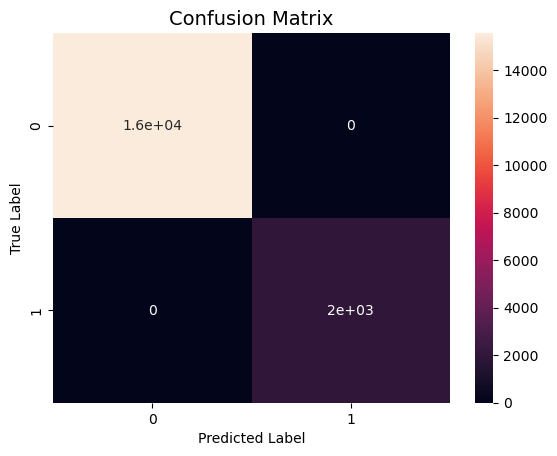

In [45]:
sns.heatmap(cfn,annot=True)
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

True Positives (TP) is 1992: The number of observations where the model predicted the vehicle occupant is arrested (1), and they are actually  arrested (1).

True Negatives (TN) is15,561: The number of observations where the model predicted the vehicle occupant is not arrested (0), and they are actually not arrested (0).

False Positives (FP) is 0: The number of observations where the model predicted the vehicle occupant is arrested (1), but they are actually not arrested (0).

False Negatives (FN) 0: The number of observations where the model predicted the vehicle occupant is not arrested (0), but they actually are arrested (1).

## Model Evaluation Metrics

In [46]:
from sklearn.metrics import classification_report

report = classification_report(y_true=y_test,y_pred=y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15561
           1       0.00      0.00      0.00      1992

    accuracy                           0.89     17553
   macro avg       0.44      0.50      0.47     17553
weighted avg       0.79      0.89      0.83     17553



Model Overfit detected most likely due to class imbalance;
Of all the instances that the model predicted as no arrest, 89% were actually no arrests(Precision=89%);
Of all the acquitals made, the model  able to predict all correctly as acquitals(Recall=100%);
Of all the Terry stops effected, the model correctly classified 89% of them correctly,(Accuracy=89);
model performance of 94%

## Class Imbalance problem

In [47]:
y_train.value_counts()

Y
0    36252
1     4704
Name: count, dtype: int64

### Addressing class imbalance problem with SMOTE

Synthetic Minority Over-sampling Technique is a technique used to address class imbalance observed above.

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
# Using Smote to address class imbalance.
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

y_train_smote.value_counts()

Y
0    36252
1    36252
Name: count, dtype: int64

##### Fitting smote logistic regression 

In [50]:
smote_logreg = LogisticRegression()

smote_logreg.fit(X_train_smote,y_train_smote)

LogisticRegression()

### Acccuracy,Recall and F1 Score for the SMOTE regressed fit

In [51]:
y_pred_smote = smote_logreg.predict(X_test)

report2 = classification_report(y_true=y_test,y_pred=y_pred_smote)
print(report2)

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     15561
           1       0.25      0.98      0.40      1992

    accuracy                           0.66     17553
   macro avg       0.62      0.80      0.58     17553
weighted avg       0.91      0.66      0.72     17553



#### Comparing SMOTE regressed fit and logistic regression classifications

In [52]:
print(report,report2)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15561
           1       0.00      0.00      0.00      1992

    accuracy                           0.89     17553
   macro avg       0.44      0.50      0.47     17553
weighted avg       0.79      0.89      0.83     17553
               precision    recall  f1-score   support

           0       1.00      0.62      0.76     15561
           1       0.25      0.98      0.40      1992

    accuracy                           0.66     17553
   macro avg       0.62      0.80      0.58     17553
weighted avg       0.91      0.66      0.72     17553



Model Overfit addressed;
Of all the instances that the model predicted as no arrest, all were actually no arrests(Precision=100%);
Of all the acquitals made, the model  able to predict 62% correctly as acquitals(Recall=62%);
Of all the Terry stops effected, the model correctly classified 66% of them correctly,(Accuracy=66%);
model performance of 76%

# Decision Tree

##### Trainning the decision tree

Creating the classifier, fitting it on the training data and making predictions on the test.

In [53]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3, random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

##### Plotting the decision tree 

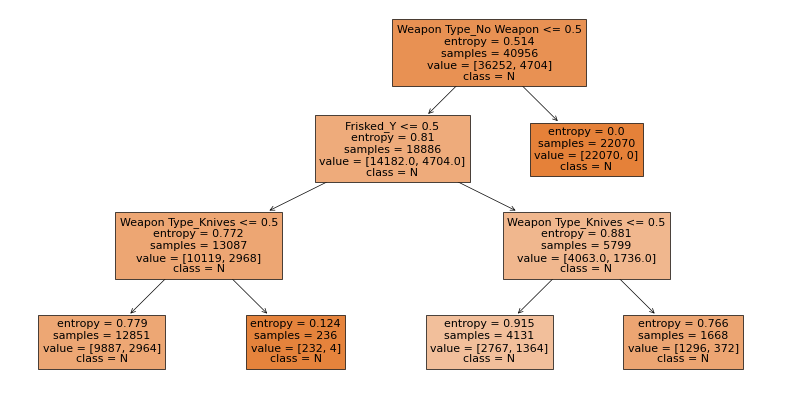

In [54]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (20,10), dpi=50)
tree.plot_tree(clf,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

#### Evaluating the predictive performance of the decision tree

In [55]:
y_pred1 = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred1))

Accuracy:  0.8865151256195523


In [56]:
y_pred2 =clf.predict(X_train)
print('Accuracy: ',accuracy_score(y_train, y_pred2))

Accuracy:  0.8851450336946968


In [57]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15561
           1       0.00      0.00      0.00      1992

    accuracy                           0.89     17553
   macro avg       0.44      0.50      0.47     17553
weighted avg       0.79      0.89      0.83     17553



print(classification_report(y_train, y_pred2))

The test and train accuracy scores are very close,The training-set accuracy score is 0.8851 while the test-set accuracy  0.8865. These two values are very close and comparable. So, there is no sign of overfitting

The test and train accuracy scores are ver close,the training-set accuracy score is 0.8851 while the test-set accuracy  0.8865. these two values are very close and comparable.

## Conclusion

Small number of observations predict arrest,while majority of observations predict no arrest.

Logistic regression model shows signs of overfitting, no overfitting detected in decision tree.

LogisticRegression, Decision tree and Random forest results are significantly compareble.

## END